# ex1: Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression

## Part 1: Basic Function

In [2]:
def warmUpExercise():
    
    # =========== code here ============
    return np.identity(5)
    # ==================================

print(warmUpExercise())

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


## Part 2: Plotting

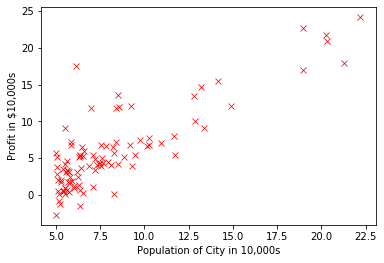

In [3]:
def loadData():
    data = np.loadtxt("ex1/ex1data1.txt",delimiter=',')
    m = data.shape[0]
    X = np.c_[np.ones(m), data[:,0]]    # m x 2
    Y = np.c_[data[:,1]]                # m x 1
    return X, Y

X, Y = loadData()
plt.scatter(X[:,1], Y, marker='x', color = 'r', linewidth = 0.75)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

## Part 3: Cost and Gradient descent

In [4]:
def computeCost(X, Y, theta = np.zeros((2,1)) ):
    m = Y.shape[0]
    J = 0

    # =========== code here ============
    yt = np.dot(X, theta)
    J = 1 / (2 * m) * np.sum(np.square(yt - Y))
    # ==================================
    
    return J

theta = np.zeros((2,1))
computeCost(X, Y, theta)

32.072733877455676

theta =  [-3.63029144  1.16636235]


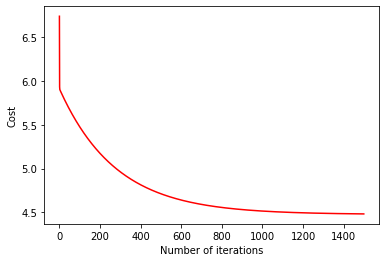

In [5]:
def gradientDescent(X, Y, theta = np.zeros((2,1)), alpha = 0.01, num_iterations = 1500):
    m = X.shape[0]
    J_history = np.zeros(num_iterations)

    for iter in np.arange(num_iterations):

        # =========== code here ============
        yt = np.dot(X, theta)
        partial = 1 / m * np.dot(X.T, yt - Y)
        theta = theta - alpha * partial
        # ==================================

        J_history[iter] = computeCost(X, Y, theta)

    return theta, J_history


theta = np.zeros((2,1))
alpha = 0.01
num_iterations = 1500
theta, J = gradientDescent(X, Y, theta, alpha, num_iterations)

print("theta = ", theta.ravel())
plt.plot(np.arange(num_iterations), J, color='red')
plt.ylabel('Cost')
plt.xlabel('Number of iterations')
plt.show()

## Part 4: Visualizing J(theta_0, theta_1)

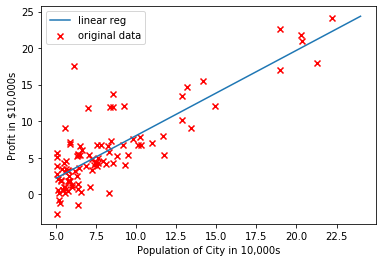

In [6]:
predict_x = np.arange(5,25)
predict_y = theta[0] + theta[1] * predict_x
plt.scatter(X[:,1], Y, marker = 'x', color = 'r', linewidths = 0.75, label = 'original data')
plt.plot(predict_x, predict_y, label = 'linear reg')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=2)   # 标签放在2象限
plt.show()

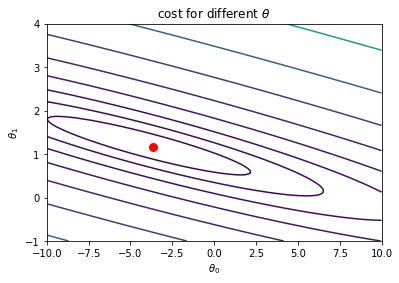

In [7]:

theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((100, 100))

xx, yy = np.meshgrid(theta0_vals, theta1_vals, indexing='xy')

for (i,j), v in np.ndenumerate(J_vals):
    t = [[xx[i,j]], [yy[i,j]]]
    J_vals[i,j] = computeCost(X, Y, t)    

plt.scatter(theta[0], theta[1], color='r', linewidths=3)
plt.contour(xx, yy, J_vals, np.logspace(-2,3,20))   # 对数表示空间
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title(r'cost for different $\theta$')
plt.show()